<div style="border:solid green 2px; padding: 20px">
<b>Привет, Георгий!</b>
    
Молодец, что быстро исправил мои комментарии.  Чтобы незапутаться, я буду зачеркивать исправленные комментарии и добавлять новые под заголовком **"Комментарий ревьюера v2"**.
    
Давай смотреть, что получилось!

<div style="border:solid green 2px; padding: 20px">
<b>Привет, Георгий!</b>

Меня зовут Алтынсай Саналова, и я буду проверять твой проект. Предлагаю общаться на «ты» :)  

Ты проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Я буду использовать следующую цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<div class="alert alert-info"> <b>Комментарий студента:</b> Хорошо. Буду благодарен если ты в конце подведёшь итог того, что я должен доделать </div>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v2</b>
    
    
Да, конечно!

# Сборный проект №1

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()
games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
<s>Указан не верный путь к файлу. Нужно исправить. Добавила ниже верный для дальнейшей проверки. </s>

<div class="alert alert-info"> <b>Комментарий студента:</b> Путь к файлу изменил. Код ревьюера удалил</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

## Шаг 2. Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру);

In [3]:
games.columns = games.columns.str.lower()
# games

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [4]:
# преобразуем year_of_release в int64
games['year_of_release'] = games['year_of_release'].astype('Int64')

# преобразуем user_score в int64
games['critic_score'] = games['critic_score'].astype('Int64')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Молодец, что форматируешь названия столбцов и их тип.

### Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

In [5]:
# посмотрим, что за пропуски в столбце 'name'
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
# Думаю их можно спокойно удалить
games.dropna(subset=['name'], inplace=True)

In [7]:
# 'tbd' означает, что будет определено, значить, что сейчас нам не известны, значит можно заменить на NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)
# меняем тип на float64
games['user_score'] = games['user_score'].astype('float64')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


Есть много пропусков в столбцах 'year_of_release', 'critic_score', 'user_score', 'rating', но пока не понимаю зачем их заполнять

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Согласна. Пропуски по year_of_release можно удалить, по остальным нельзя заполнять, поскольку отсутствие данных - это тоже отличительный признак.
    

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [8]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
<s>Альтернативный способ подсчета:
    
    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert alert-info"> <b>Комментарий студента:</b> Изменил на альтернативный способ. Он короче и удобнее.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

## Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

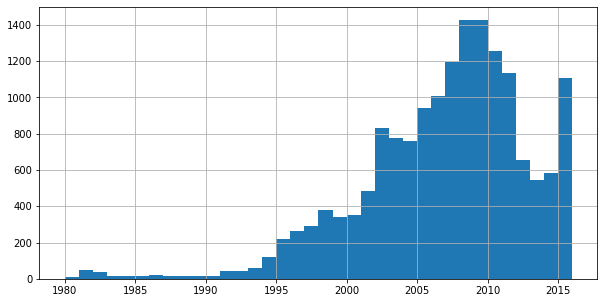

In [9]:
games['year_of_release'].hist(bins=36, figsize=(10, 5))

Можно увидеть рос начиная с 1993 года

### Посмотрите, как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [10]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

Отобрали топ-5 платформ по суммарным продажам. Теперь построим распределение по годам.

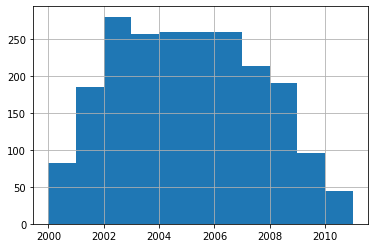

In [11]:
# PS2
games.query('platform == "PS2"')['year_of_release'].hist(bins=11)

Видно, что пик выпущенных игр для PS2 пришелся на 2002, немного спал в 2003 и не спадал вплоть до 2007. 

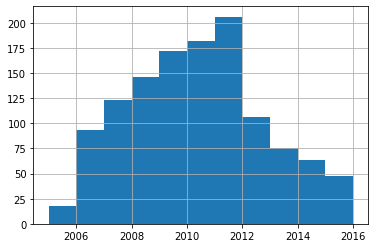

In [12]:
# X360
games.query('platform == "X360"')['year_of_release'].hist(bins=11)

С каждым годом виден рост игр дл X360. В 2012 в два раза меньше было выпущенно игр для X360, чем в прошлом году. Динамика пошла на спад.

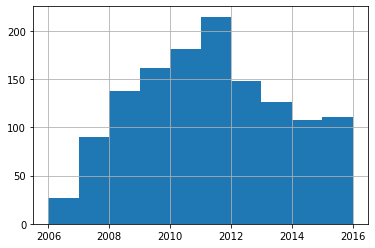

In [13]:
# PS3
games.query('platform == "PS3"')['year_of_release'].hist(bins=10)

Для PS3 мы видим равномерный подъем до 2011 и равномерный спад.

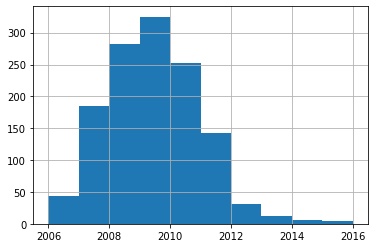

In [14]:
# Wii
games.query('platform == "Wii"')['year_of_release'].hist(bins=10)

Для Wii пик выпускаемых игр пришел на 2009 год. Начиная с 2012 года игр на Wii выпукалось меньше, по сравнению с предыдущими годами.

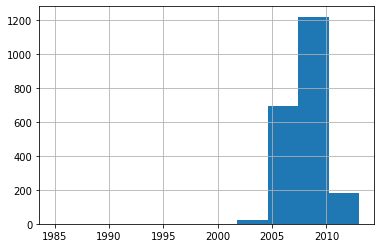

In [15]:
# DS
games.query('platform == "DS"')['year_of_release'].hist()

Можно увидеть, что есть одна игра, которая была выпущена только для рынка японии в 1985 году. Я думаю это ошибка. Игра была выпущена в 2010 году

In [16]:
games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [17]:
# Исправим на 2010
games.loc[15957, 'year_of_release'] = 2010

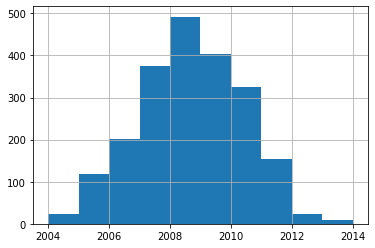

In [18]:
# DS
games.query('platform == "DS"')['year_of_release'].hist(bins=10, range=(2004, 2014))

Для DS игры начали выпускать в 2004 году и до 2014. Пик пришелся на 2008 год

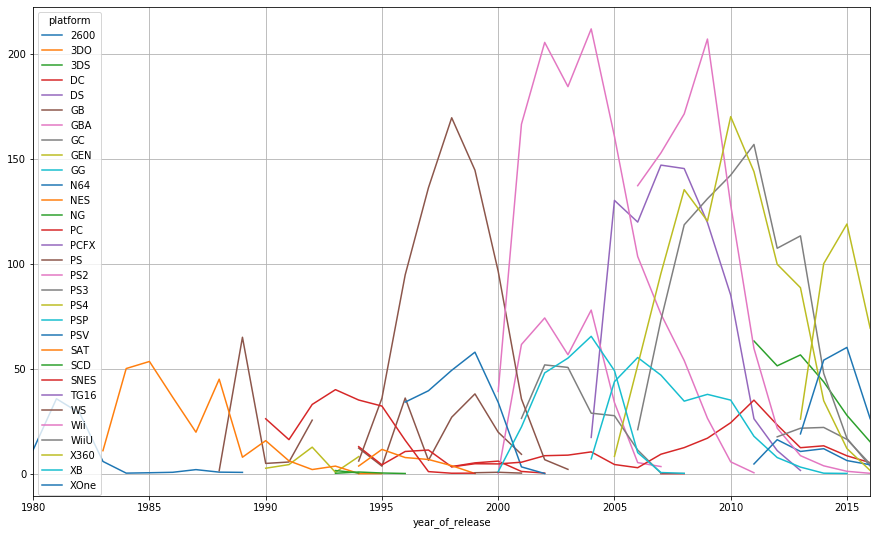

In [19]:
games.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(grid=True, figsize=(15, 9))

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
<s>График не построился.</s>

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал по-другому</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

Можно сделать вывод, что средний срок жизни платформы и выпускаемых для неё игр составляет примерно 8 лет.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Молодец, что строишь графики и анализируешь распределение.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
<s>Давай рассмотрим не количество выпускаемых игр на платформе, а сумму проданных копий. Ведь популярность платформы больше определяется ее продажами.</s>

<div class="alert alert-info"> <b>Комментарий студента:</b> Изменил 'count' на 'sum'</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

### Возьмите данные за соответствующий актуальный период. 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [20]:
gm = games.query('year_of_release > 2013')

In [21]:
gm['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

Не учитывайте в работе данные за предыдущие годы.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>

<s>Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды</s>

<div class="alert alert-info"> <b>Комментарий студента:</b> Взял данные с 2014 года</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

### Какие платформы лидируют по продажам, растут или падают? 
Выберите несколько потенциально прибыльных платформ.

In [22]:
gm.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

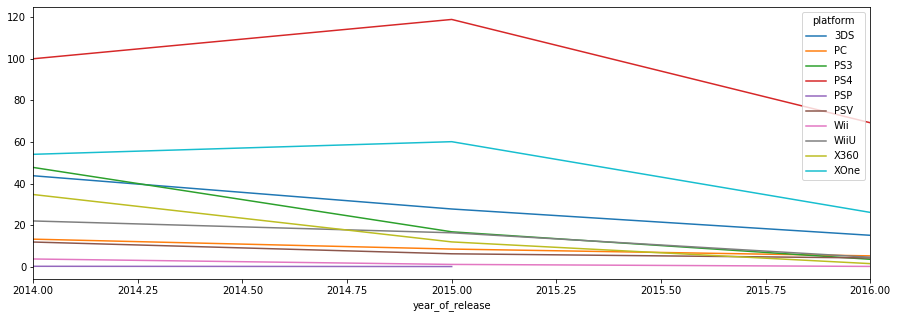

In [23]:
gm.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize=(15, 5))

Видео наибольшую популярность у платформ PS4, XOne

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Молодец, что строишь график для анализа платформ. С изменением актульного периода, картина может измениться.

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
Советую рассматривать динамику платформ отдельно, поскольку многие графики накладываются. На основе такого анализа можно убрать платформы, которые кажутся отмирающими и у которых продажи упали почти до нуля.
    

<div class="alert alert-info"> <b>Комментарий студента:</b> Как рассматривать платформы отдельно? Хотел бы с удовольствием узнать как это можно правильно сделаю </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
На самом деле, можно прописать циклом. Например, создаем список платформ, потом циклом для каждой платформы строим barplot. По результату, получим график для каждой платформы. Рассмотреть можно только те платформы, что попали в твой актульный период. Но динамику по ним лучше смотреть за весь период. Возможно, есть платформы, которые свое отжили (продажи в последние годы сошли к нулю), и мы можем спокойно их убрать из актуальных данных.
    
Этот комментарий не обязательный для принятия работы. Просто мне кажется, что так будет проще анализировать. 

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
Опишите результат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



(0, 2)

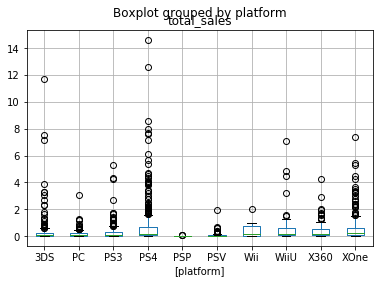

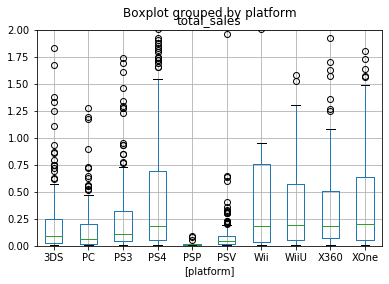

In [24]:
gm.boxplot(column=['total_sales'], by=['platform'])
plt.show

gm.boxplot(column=['total_sales'], by=['platform'])
plt.ylim(0, 2)

Можно увидеть, что повальное большинство продаж сосредоточенно около 1 млн копий. Самые большие выбросы есть у таких платформ как PS4, XOne и Wii.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>

<s>К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, например, задав параметр ylim.</s>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил еще график с условием ylim</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

**Оценка критиков**

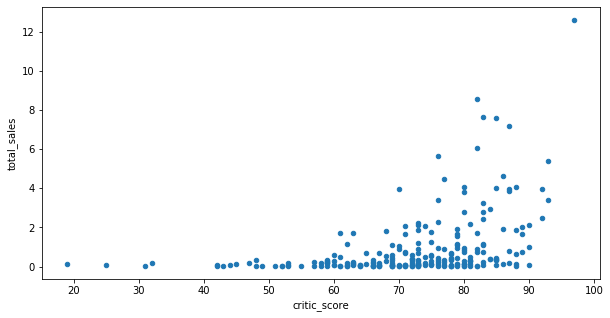

In [25]:
gm[gm['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', figsize = (10, 5))

In [26]:
# ps3 = gm[gm['platform'] == 'PS3']
# ps3.info()

In [27]:
# Этот код вызывает ошибку, и я не знаю почему
# ps3['critic_score'].corr(ps3['total_sales'])

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
Я думаю, это из-за того, что есть пропущенные значения. Когда ты их разделяешь на series, то питон игнорирует пропущенные значения, и как бы получается, что размерность у данных разная. Такой проблемы не возникает, если ты берешь другой столбец, где пропусков нет. А если считать датафрэйм целиком, то питон может целиком убрать строки с пропусками.

In [28]:
PS4 = gm[gm['platform'] == 'PS4'].corr()
PS4.loc['critic_score', 'total_sales']

0.40266141068104083

Видно,что с ростом оценки идет рост продаж. Можно сказать, что корреляция положительная.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Согласна, наблюдается слабая корреляция.

**Пользовательская оценка**

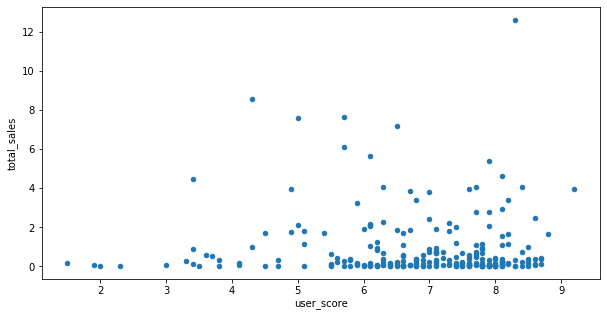

In [29]:
gm[gm['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', figsize = (10, 5))

In [30]:
PS4.loc['user_score', 'total_sales']

-0.040131589472697356

Можно сказать, что корреляция отсутствует

### Соотнесите выводы с продажами игр на других платформах.

**Оценки критиков**

In [31]:
XOne = gm[gm['platform'] == 'XOne'].corr()
XOne.loc['critic_score', 'total_sales']

0.4286769437033325

In [32]:
ThreeDS = gm[gm['platform'] == '3DS'].corr()
ThreeDS.loc['critic_score', 'total_sales']

0.31411749286905105

Корреляция почти слабая

In [33]:
PS3 = gm[gm['platform'] == 'PS3'].corr()
PS3.loc['critic_score', 'total_sales']

0.4465746049319071

In [34]:
X360 = gm[gm['platform'] == 'X360'].corr()
X360.loc['critic_score', 'total_sales']

0.525722835658152

Корреляция положительная и можно сделать вывод, что хороший рейтинг игры действительно влияет на продажи.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
<s>Корреляция слабая, принято считать, что корреляция меньше 0.3 говорит об ее отсутствии.</s>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Молодец, что проанализировал корреляцию для разных платформ.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
<s>Давай аналогично проанализируем зависимость продаж от оценки пользователей.</s>
    

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

**Пользовательские оценки**

In [35]:
XOne.loc['user_score', 'total_sales']

-0.07038392806475821

In [36]:
ThreeDS.loc['user_score', 'total_sales']

0.21519327185270282

In [37]:
PS3.loc['user_score', 'total_sales']

-0.1667614134766211

In [38]:
X360.loc['user_score', 'total_sales']

-0.13844457094566515

А у пользователей видно, что корреляции нет.

<div class="alert alert-info"> <b>Комментарий студента:</b> Проанализировал корреляцию. Добавил еще корреляцию с пользовательскими оценками.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Отлично!

### Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [39]:
genre_table = gm.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
genre_table.columns = ['genre', 'total_sales']

In [40]:
genre_table

,genre,total_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



(0, 4)

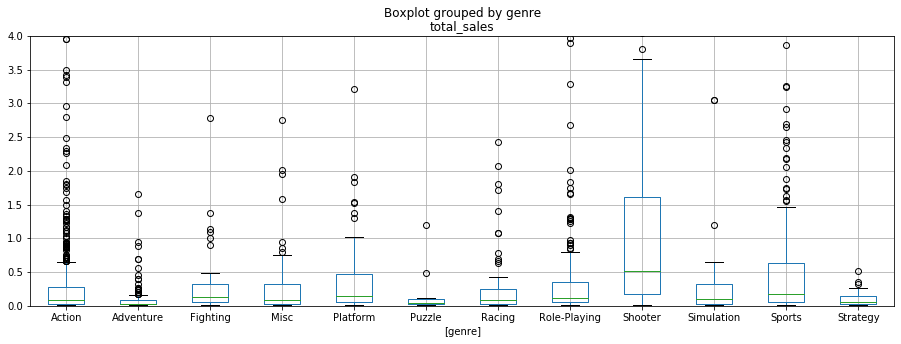

In [41]:
gm.boxplot(column=['total_sales'], by=['genre'], figsize=(15, 5))
plt.ylim(0, 4)

Больше всего денег принёс жанр Action с общей прибылью в 199 млн. Но 75% всех игр продаются меньше 0.5 млн. А вот у жанра Shooter (170 млн.) 75% продаются больше 1.5 млн, поэтому можно с уверенностью сказать, что жанр Shooter является самым прибыльным

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Согласна, action лидирует по общим продажам.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>

<s>Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.</s>

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал боксплоты и изменил вывод </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

## Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [42]:
# В столбце рейтинг много пропусков. Заменим их
gm['rating'] = gm['rating'].fillna('Unknown')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Создадим сводные таблицы

In [43]:
# платформы
NA_pop_platform = gm.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_pop_platform['percent'] = (NA_pop_platform['na_sales']/(NA_pop_platform['na_sales'].sum())).round(2)

EU_pop_platform = gm.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_pop_platform['percent'] = (EU_pop_platform['eu_sales']/(EU_pop_platform['eu_sales'].sum())).round(2)

JP_pop_platform = gm.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_pop_platform['percent'] = (JP_pop_platform['jp_sales']/(JP_pop_platform['jp_sales'].sum())).round(2)

# жанры
NA_pop_genre = gm.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_pop_genre['percent'] = (NA_pop_genre['na_sales']/(NA_pop_genre['na_sales'].sum())).round(2)

EU_pop_genre = gm.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_pop_genre['percent'] = (EU_pop_genre['eu_sales']/(EU_pop_genre['eu_sales'].sum())).round(2)

JP_pop_genre = gm.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_pop_genre['percent'] = (JP_pop_genre['jp_sales']/(JP_pop_genre['jp_sales'].sum())).round(2)

# рейтинг
NA_pop_rating = gm.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_pop_rating['percent'] = (NA_pop_rating['na_sales']/(NA_pop_rating['na_sales'].sum())).round(2)

EU_pop_rating = gm.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_pop_rating['percent'] = (EU_pop_rating['eu_sales']/(EU_pop_rating['eu_sales'].sum())).round(2)

JP_pop_rating = gm.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_pop_rating['percent'] = (JP_pop_rating['jp_sales']/(JP_pop_rating['jp_sales'].sum())).round(2)

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

,na_sales,percent
platform,,
PS4,98.61,0.35
XOne,81.27,0.29
X360,28.30,0.10
3DS,22.64,0.08
PS3,22.05,0.08


,eu_sales,percent
platform,,
PS4,130.04,0.48
XOne,46.25,0.17
PS3,25.54,0.09
PC,17.97,0.07
3DS,16.12,0.06


,jp_sales,percent
platform,,
3DS,44.24,0.48
PS4,15.02,0.16
PSV,14.54,0.16
PS3,11.22,0.12
WiiU,7.31,0.08


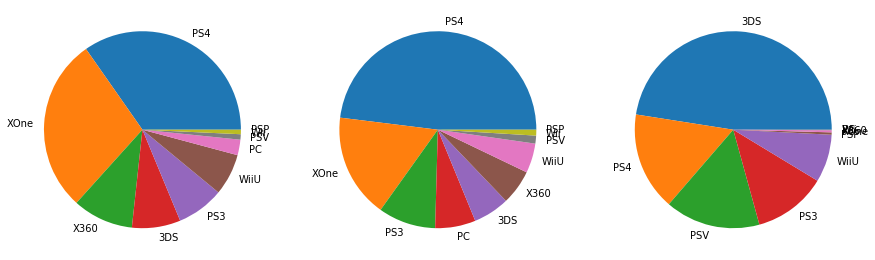

In [44]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].pie( x = NA_pop_platform['na_sales'], labels = NA_pop_platform.index)
ax[1].pie(EU_pop_platform['eu_sales'],labels = EU_pop_platform.index)
ax[2].pie(JP_pop_platform['jp_sales'], labels = JP_pop_platform.index)
plt.show

display(NA_pop_platform.head())
display(EU_pop_platform.head())
display(JP_pop_platform.head())


На рынке NA: В топ-5 популярных платформ входят X360, PS3, 3DS, XOne, PS4. Самой популярной является PS4 с долей в 35%.

На рынке EU: 48% от всех продаж занимает PS4. На втором месте XOne

А вот в регионе JP всё совершенно подругому. Самая популярная консоль 3DS - 48%. PS4 на втором месте - 16%

### Самые популярные жанры (топ-5). Поясните разницу.

,na_sales,percent
genre,,
Shooter,79.02,0.28
Action,72.53,0.26
Sports,46.13,0.16
Role-Playing,33.47,0.12
Misc,15.05,0.05


,eu_sales,percent
genre,,
Action,74.68,0.28
Shooter,65.52,0.24
Sports,45.73,0.17
Role-Playing,28.17,0.10
Racing,14.13,0.05


,jp_sales,percent
genre,,
Role-Playing,31.16,0.33
Action,29.58,0.32
Fighting,6.37,0.07
Misc,5.61,0.06
Shooter,4.87,0.05


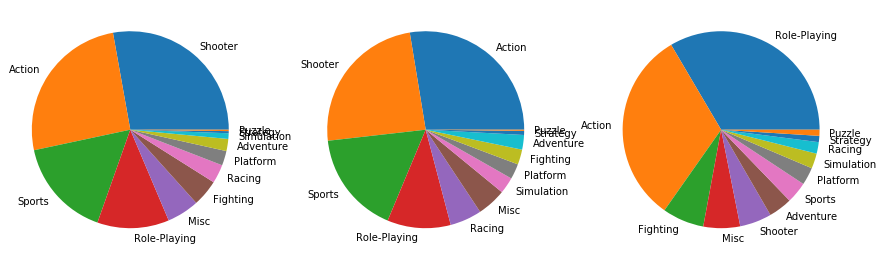

In [45]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].pie( x = NA_pop_genre['na_sales'], labels = NA_pop_genre.index)
ax[1].pie(EU_pop_genre['eu_sales'],labels = EU_pop_genre.index)
ax[2].pie(JP_pop_genre['jp_sales'], labels = JP_pop_genre.index)
plt.show

display(NA_pop_genre.head())
display(EU_pop_genre.head())
display(JP_pop_genre.head())


На рынке NA: В топ-5 популярных жанров входят Action, Shooter, Sports, Misc, Role-Playing. Самой популярной является Shooter с долей в 28%.

На рынке EU: 28% занимает жанр Action

На рынке JP: С огромным отрывом жанр Role-Playing (33%) отрывается от Action (32%). Shooter на 5 месте (5%)

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales,percent
rating,,
M,96.42,0.34
Unknown,64.72,0.23
E,50.74,0.18
T,38.95,0.14
E10+,33.23,0.12


,eu_sales,percent
rating,,
M,93.44,0.35
Unknown,58.95,0.22
E,58.06,0.21
T,34.07,0.13
E10+,26.16,0.10


,jp_sales,percent
rating,,
Unknown,56.90,0.61
T,14.78,0.16
E,8.94,0.10
M,8.01,0.09
E10+,4.46,0.05


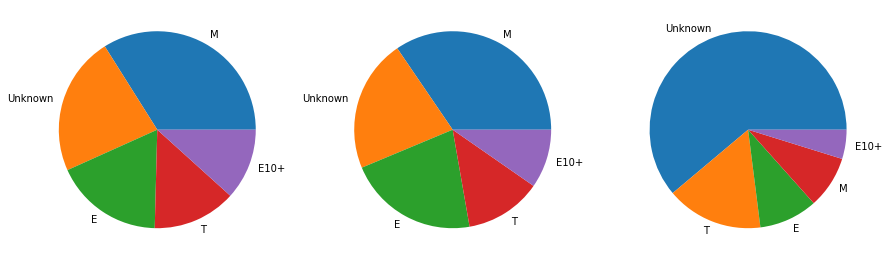

In [46]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].pie( x = NA_pop_rating['na_sales'], labels = NA_pop_rating.index)
ax[1].pie(EU_pop_rating['eu_sales'],labels = EU_pop_rating.index)
ax[2].pie(JP_pop_rating['jp_sales'], labels = JP_pop_rating.index)
plt.show

display(NA_pop_rating.head())
display(EU_pop_rating.head())
display(JP_pop_rating.head())

На рынке NA: Самый популярный рейтинг - M, с долей в 34%. На втором месте стоит E - 18%. А вот игры с неизвестным рейтингом составляет целых 23%.

На рынке EU: 35% занимает рейтинг M. А вот игры с неизвестным рейтингом составляет целых 22 процента.

На рынке JP:Целых 61% занимаеют игры с неизвестным рейтингом! На втором месте стоит рейтинг - E (16%)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Отличные графики и выводы по регионам.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
<s>Обрати внимание, что есть пропуски в столбце rating, который также важно отразить. Можно заменить их на Unknown, чтобы они также попали в графики.</s>

<div class="alert alert-info"> <b>Комментарий студента:</b> Заменил пустые значения в столбце rating на Unknown. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>
    
Исправлено

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
Я бы советовала, строить графики по регионам рядом с помощью subplots, таким образом проще сравнивать.

<div class="alert alert-info"> <b>Комментарий студента:</b> Я поискал в интернете как посторить графики с помошью subplot, но не понял как это можно приминить у меня. Буду очень благодарен, если ты подскажешь как это сделать. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2⚠️:</b>
    
Лови пример кода с subplot. График недооформлен. Надо добавить название общее и для каждого кружка c названием региона. Есть также статья для изучения subplots, если интересно:
    
    https://pyprog.pro/mpl/mpl_main_components.html
    


<div class="alert alert-info"> <b>Комментарий студента:</b> Полтостью переделал этот Шаг</div>

<function matplotlib.pyplot.show(*args, **kw)>

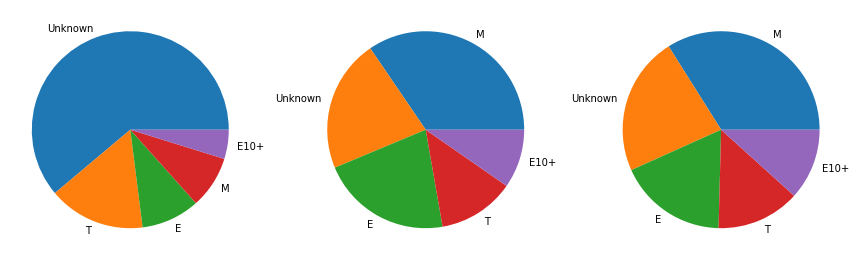

In [47]:
#код ревьюера
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].pie( x = JP_pop_rating['jp_sales'], labels = JP_pop_rating.index)
ax[1].pie(EU_pop_rating['eu_sales'],labels = EU_pop_rating.index)
ax[2].pie(NA_pop_rating['na_sales'], labels = NA_pop_rating.index)
plt.show

### Общий вывод
Портрет пользователя живущего в NA регионе такой:
- Консоль - PS4
- Жанр - Shooter
- Рейтинг - M

Портрет пользователя живущего в EU регионе такой:
- Консоль - PS4
- Жанр - Action
- Рейтинг - M

Портрет пользователя живущего в JP регионе такой:
- Консоль - 3DS
- Жанр - Role-Playing
- Рейтинг - E или Unknown

## Шаг 5. Проверьте гипотезы
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:
 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Выдвигаем нулевую гипотезу, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC разные"

In [54]:
XOne = gm.query('platform == "XOne"').user_score.dropna()
PC = gm.query('platform == "PC"').user_score.dropna()


alpha = 0.05


results = st.ttest_ind(
    XOne, 
    PC,
    equal_var=False)
 
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


In [55]:
print('Средние пользовательские рейтинги у Xbox One -', XOne.mean())
print('Средние пользовательские рейтинги у PC -', PC.mean())

Средние пользовательские рейтинги у Xbox One - 6.594545454545456
Средние пользовательские рейтинги у PC - 6.298360655737705


Да, действительно стредние оценки у Xone и PC почти одинаковые.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Согласна, нулевую гипотезу отвергнуть не можем.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Выдвигаем нулевую гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза звучит так: "Средние пользовательские рейтинги жанров Action и Sports разные"

In [56]:
Action = gm.query('genre == "Action"').user_score.dropna()
Sports = gm.query('genre == "Sports"').user_score.dropna()


alpha = 0.05


results = st.ttest_ind(
    Action, 
    Sports,
    equal_var=False)
 
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [57]:
print('Средние пользовательские рейтинги у Action -', Action.mean())
print('Средние пользовательские рейтинги у Sports -', Sports.mean())

Средние пользовательские рейтинги у Action - 6.760606060606061
Средние пользовательские рейтинги у Sports - 5.2251968503937


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Отличное тестирование гипотез.

<div class="alert alert-danger">
<b>Комментарий ревьюера v2❌:</b>
    
<s>Пропустила при первой проверке: "Средние пользовательские рейтинги жанров Action и Sports одинаковые" - это наша нулевая гипотеза.</s>

<div class="alert alert-info"> <b>Комментарий студента:</b> Изменил нулевую гипотезу </div>

## Общий вывод

Вот какие выводы можно сделать из исследования:
 - Сильный рост выпуска игр прослеживается с 1993 года.
 - Средний срок жизни платформы/консоли составляет 8 лет.
 - Сейчас набирают рост такие платформы как PS4 и XOne.
 - Можно увидеть, что повальное большинство продаж для всех консолей сосредоточенно около 1 млн копий. Самые большие выбросы есть у PS3, X360 и Wii. К ним подбираются платформы PS4 и XOne
 - Корреляция между оценками и продажами положительная, значит можно сделать вывод, что хороший рейтинг игры действительно влияет на продажи.
 - Самым прибыльным жанром является Action с общей прибылью в 810 млн. 2, 3 и 4 места занимают Shooter (549 млн.), Sports (465.76 млн.) и Role-Playing (362.59 млн.). Самым не прибыльным жанром является Puzzle. Всего 40.39 млн. 
 - Портреты пользователей:
    - Портрет пользователя живущего в NA регионе такой:
        - Консоль - PS4
        - Жанр - Shooter
        - Рейтинг - M

    - Портрет пользователя живущего в EU регионе такой:
        - Консоль - PS4
        - Жанр - Action
        - Рейтинг - M

    - Портрет пользователя живущего в JP регионе такой:
        - Консоль - 3DS
        - Жанр - Role-Playing
        - Рейтинг - E или Unknown
    
 - После проверки гипотез были полученны такие результаты:
     - Гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые не получилось отвергнуть.
     - Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные была отвергнута.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Молодец, что пишешь выводы.

<div style="border:solid green 2px; padding: 20px">
<b>Финальный комментарий ревьюера</b>
    
Отличный проект, чистый и аккуратный код. Оставила тебе комментарии, которые помогут улучшить проект.
    
Если есть вопросы, пожалуйста, пиши. Буду рада ответить.
    
Спасибо за твой труд. Буду ждать исправленную версию!

<div style="border:solid green 2px; padding: 20px">
<b>Финальный комментарий ревьюера v2</b>
    
Молодец, отлично справился с комментариями.
    
Из критических комментариев остался один, а точнее появился, потому что я его пропустила при первой проверке. Это неправильная нулевая и альтернативная гипотезы во второй части проверки гипотез.    
    
Есть также желтые комментарии - по отдельным графикам и subplots. Я постаралась подробно прописать, как их можно исправить. Но я могу принять и без их исправления.
    
Спасибо за твой труд. Буду ждать исправленную версию!